# Importación de librerías y carga de datos

In [54]:
"""
Modulo de entrenamiento para diferentes pipelines de ML para el
entrenamiento utilizando los datasets creados. El flujo es capaz de 
generalizar en la mayoría de los casos y únicamente es necesario
realizar modificaciones en la ruta a los datos.

"""
import os
import pandas as pd 
import seaborn as sns                                                   
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from boruta import BorutaPy



In [55]:
path=r'C:\Users\Luisa\OneDrive - Universidad de Antioquia\GRUNECO\Doctorado Ximena\pca\PCA_without_powers.csv'.replace('\\','/')
#path=r'C:\Users\Luisa\OneDrive - Universidad de Antioquia\GRUNECO\Doctorado Ximena\pca\sl\PCA_sl.csv'.replace('\\','/')
data=pd.read_csv(path)
data=data.drop('Unnamed: 0',axis=1)
data

,participant_id,group,visit,condition,database,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,sub-28,Control,S1,OE,Estudiantes2021,-2.122219,-6.437053,-3.613221,-4.602268,-1.592677,-2.237039,0.346887,3.440553,-1.042649,-0.235661
1,sub-28,Control,S2,OE,Estudiantes2021,-1.710038,-5.319942,-3.890323,-3.584753,-0.461065,-1.769921,-2.097647,2.662980,-1.175682,-2.272999
2,sub-28,Control,S3,OE,Estudiantes2021,-4.304134,-3.275919,-2.201900,-1.865118,-1.557313,-1.274306,-1.078149,1.692429,-2.554475,-0.623871
3,sub-28,Control,S4,OE,Estudiantes2021,-3.506473,-4.139492,-4.743824,-3.865081,-1.699913,-1.645279,0.442043,-0.094860,-1.111744,0.353679
4,sub-29,Control,S1,OE,Estudiantes2021,-8.625114,-3.967045,-4.518882,-4.495660,-0.089303,1.374965,-0.011131,-0.309393,1.415310,0.756237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,sub-23,Control,S1,T3,Residentes,-3.066400,4.311027,-0.059830,-2.794946,-1.616553,-4.278752,-1.534923,-3.933479,0.588587,-4.042032
637,sub-23,Control,S2,T3,Residentes,-8.016001,0.898058,0.675803,-2.852196,-2.439503,0.658009,0.332676,-4.008630,1.839943,-1.821437
638,sub-23,Control,S3,T3,Residentes,-11.505829,-2.040332,2.570926,-1.619208,1.131224,2.089528,1.188056,-0.782241,-0.193683,-2.726806
639,sub-23,Control,S4,T3,Residentes,-8.762463,-5.174781,-0.828348,-3.611841,1.430230,-1.417700,0.307875,-1.515718,0.412961,-3.037071


In [56]:
# path_scores=r'C:\Users\Victoria\OneDrive - Universidad de Antioquia\GRUNECO\Doctorado Ximena\LapSim.xlsx'.replace('\\','/')
# data_scores=pd.read_excel(path_scores)
# # T3_SCORES=data_scores[data_scores.condition=='T3'].index
# # data_scores.drop(T3_SCORES,inplace=True)


# OE=data[data.condition=='OE'].index
# CE=data[data.condition=='CE'].index
# T3=data[data.condition=='T3'].index
# data.drop(OE,inplace=True)
# data.drop(CE,inplace=True)




# merge_pd=pd.merge( data_scores,data,on=['participant_id','database','visit','condition']) # T1 Y T2 Y T3 


# data.drop(T3,inplace=True)
#merge_pd=pd.merge( data_scores,data,on=['participant_id','database','visit','condition']) , # T1 Y T2 

# T1_S=data_scores[data_scores.condition=='T1']
# T2_S=data_scores[data_scores.condition=='T2']
# T3_S=data_scores[data_scores.condition=='T3']


# T1=data[data.condition=='T1']
# T2=data[data.condition=='T2']
# T3=data[data.condition=='T3']

#merge_pd=pd.merge( T1_S,T1,on=['participant_id','database','visit','condition']) , # T1 
#merge_pd=pd.merge( T2_S,T2,on=['participant_id','database','visit','condition']) , # T2
#merge_pd=pd.merge( T3_S,T3,on=['participant_id','database','visit','condition']) , # T3

# path=r'C:\Users\Victoria\OneDrive - Universidad de Antioquia\GRUNECO\Doctorado Ximena\pca'
# merge_pd.to_csv('{Path}/merge_pca_scores_T3.csv'.format(Path=path))

In [57]:
# data=merge_pd

In [58]:
data

,participant_id,group,visit,condition,database,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,sub-28,Control,S1,OE,Estudiantes2021,-2.122219,-6.437053,-3.613221,-4.602268,-1.592677,-2.237039,0.346887,3.440553,-1.042649,-0.235661
1,sub-28,Control,S2,OE,Estudiantes2021,-1.710038,-5.319942,-3.890323,-3.584753,-0.461065,-1.769921,-2.097647,2.662980,-1.175682,-2.272999
2,sub-28,Control,S3,OE,Estudiantes2021,-4.304134,-3.275919,-2.201900,-1.865118,-1.557313,-1.274306,-1.078149,1.692429,-2.554475,-0.623871
3,sub-28,Control,S4,OE,Estudiantes2021,-3.506473,-4.139492,-4.743824,-3.865081,-1.699913,-1.645279,0.442043,-0.094860,-1.111744,0.353679
4,sub-29,Control,S1,OE,Estudiantes2021,-8.625114,-3.967045,-4.518882,-4.495660,-0.089303,1.374965,-0.011131,-0.309393,1.415310,0.756237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,sub-23,Control,S1,T3,Residentes,-3.066400,4.311027,-0.059830,-2.794946,-1.616553,-4.278752,-1.534923,-3.933479,0.588587,-4.042032
637,sub-23,Control,S2,T3,Residentes,-8.016001,0.898058,0.675803,-2.852196,-2.439503,0.658009,0.332676,-4.008630,1.839943,-1.821437
638,sub-23,Control,S3,T3,Residentes,-11.505829,-2.040332,2.570926,-1.619208,1.131224,2.089528,1.188056,-0.782241,-0.193683,-2.726806
639,sub-23,Control,S4,T3,Residentes,-8.762463,-5.174781,-0.828348,-3.611841,1.430230,-1.417700,0.307875,-1.515718,0.412961,-3.037071


In [59]:
# oe=data[data.condition=='OE'].index
# data.drop(oe,inplace=True)
# ce=data[data.condition=='CE'].index
# data.drop(ce,inplace=True)

estudiantes=data[data.database=='Estudiantes']
estudiantes2021=data[data.database=='Estudiantes2021']
residentes=data[data.database=='Residentes']

In [60]:
data.condition.unique()

array(['OE', 'CE', 'T1', 'T2', 'T3'], dtype=object)

In [61]:
print(estudiantes.condition.unique(),estudiantes2021.condition.unique(),residentes.condition.unique())
print(estudiantes.visit.unique(),estudiantes2021.visit.unique(),residentes.visit.unique())
print(len(estudiantes),len(estudiantes2021),len(residentes))

['CE' 'OE' 'T2' 'T3'] ['OE' 'CE' 'T1' 'T2'] ['CE' 'OE' 'T1' 'T2' 'T3']
['S1' 'S2' 'S3' 'S4'] ['S1' 'S2' 'S3' 'S4'] ['S1' 'S2' 'S3' 'S4' 'S5']
125 59 457


In [62]:
print(f'sujetos: {data.shape[0]} | caracteristicas: {data.shape[1]}')

sujetos: 641 | caracteristicas: 15


In [63]:
data['condition_task']=data['condition']
data['condition_task'].where(~(data.condition_task=='T1'),other='Task',inplace=True)
data['condition_task'].where(~(data.condition_task=='T2'),other='Task',inplace=True)
data['condition_task'].where(~(data.condition_task=='T3'),other='Task',inplace=True)
data.condition_task.unique()

array(['OE', 'CE', 'Task'], dtype=object)

# Preprocesamiento

## Análisis exploratorio de datos

In [64]:
for group in data['visit'].unique():
        
        print('{} : {}'.format(group, (data['visit']==group).sum()))

S1 : 159
S2 : 151
S3 : 147
S4 : 145
S5 : 39


In [65]:
s5=data[data.visit=='S5'].index
data.drop(s5,inplace=True)

In [66]:
#  si el desempeño se puede predecir mediante la información de los pca, hacer grafico entre promedios y tiempo , para ver si 
# hay un aumento en el tiempo

# sacar un modelo con el label de desempeño
# papers tener un parrafo de la metodología en donde se referencie los métodos y modelos 

In [67]:
# 1. modelo predice
# 2. cuales son las features son las más importantes en la predicción del modelo -> GINI Tiene que ver con la estructura del modelo
# gini, quiere decir que las que tiene más influencia , si se quita el modelo va cambiar 
# poder de predicción, otras métricas -> 


In [68]:
for group in data['visit'].unique():
        
        print('{} : {}'.format(group, (data['visit']==group).sum()))

S1 : 159
S2 : 151
S3 : 147
S4 : 145


In [69]:
data.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,-0.128215,-0.001839,0.002550,0.028511,0.044749,-0.044748,0.022104,-0.015271,-0.044152,0.005418
std,11.985123,6.668120,4.847802,4.200006,3.937695,3.258103,3.113215,3.070358,2.842178,2.667697
min,-16.550647,-13.259740,-14.264061,-14.923204,-14.213350,-11.165581,-12.395440,-11.011194,-11.067092,-12.439625
25%,-8.405878,-4.339922,-2.858359,-2.410660,-2.037970,-1.932878,-1.624635,-1.689377,-1.602937,-1.646972
50%,-3.262105,-1.616989,-0.004829,-0.285391,-0.070195,-0.160865,-0.073386,0.133845,-0.071350,-0.183917
75%,4.565871,2.870831,2.812306,2.196991,1.917757,1.706723,1.759790,1.690676,1.672350,1.515579
max,53.349619,37.600125,20.780284,22.295994,19.290811,34.150816,14.935181,13.794848,12.550052,13.595630


In [70]:
data.groupby(by='visit').describe().T

visit               S1          S2          S3          S4
PC1  count  159.000000  151.000000  147.000000  145.000000
     mean    -0.630181   -0.976236    0.462405    0.706561
     std     10.981196   12.529422   12.071850   12.402788
     min    -15.499558  -16.550647  -14.679131  -15.839759
     25%     -8.218434   -9.437999   -8.011002   -8.627634
...                ...         ...         ...         ...
PC10 min    -12.439625   -5.580610   -4.580301   -8.643161
     25%     -1.995804   -1.387204   -1.402991   -1.391202
     50%     -0.587288    0.113151   -0.254842    0.033228
     75%      1.390061    1.827322    1.308263    1.639197
     max      5.891586    8.735158    9.282173   13.595630

[80 rows x 4 columns]

In [71]:
# eliminación de columnas con datos faltantes

for column in data.columns:

    if data[column].isna().sum() != 0:

        print('{} : {}'.format(column, (data[column].isna().sum())))
        data.drop(column, axis=1, inplace=True)

In [72]:
print(f'sujetos: {data.shape[0]} | caracteristicas: {data.shape[1]}')

sujetos: 602 | caracteristicas: 16


In [73]:
# Se mapean las clases 

clases_mapeadas = {label:idx for idx,label  
                   in enumerate(np.unique(data['condition_task']))}

data.loc[:,'condition_task'] = data.loc[:,'condition_task'].map(clases_mapeadas) 
print(clases_mapeadas)

{'CE': 0, 'OE': 1, 'Task': 2}


In [74]:
clases_mapeadas = {label:idx for idx,label  
                   in enumerate(np.unique(data['visit']))}

data.loc[:,'visit'] = data.loc[:,'visit'].map(clases_mapeadas) 
print(clases_mapeadas)

{'S1': 0, 'S2': 1, 'S3': 2, 'S4': 3}


In [75]:
data['visit'] = pd.to_numeric(data['visit'])
data['condition_task'] = pd.to_numeric(data['condition_task'])

In [76]:
print(data.dtypes.unique())

[dtype('O') dtype('int64') dtype('float64')]


In [77]:
data.select_dtypes('O')

,participant_id,group,condition,database
0,sub-28,Control,OE,Estudiantes2021
1,sub-28,Control,OE,Estudiantes2021
2,sub-28,Control,OE,Estudiantes2021
3,sub-28,Control,OE,Estudiantes2021
4,sub-29,Control,OE,Estudiantes2021
...,...,...,...,...
636,sub-23,Control,T3,Residentes
637,sub-23,Control,T3,Residentes
638,sub-23,Control,T3,Residentes
639,sub-23,Control,T3,Residentes


In [78]:
# data pasa a ser el arreglo únicamente con los datos númericos

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data = data.select_dtypes(include=numerics)

data.shape

(602, 12)

In [79]:
data

,visit,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,condition_task
0,0,-2.122219,-6.437053,-3.613221,-4.602268,-1.592677,-2.237039,0.346887,3.440553,-1.042649,-0.235661,1
1,1,-1.710038,-5.319942,-3.890323,-3.584753,-0.461065,-1.769921,-2.097647,2.662980,-1.175682,-2.272999,1
2,2,-4.304134,-3.275919,-2.201900,-1.865118,-1.557313,-1.274306,-1.078149,1.692429,-2.554475,-0.623871,1
3,3,-3.506473,-4.139492,-4.743824,-3.865081,-1.699913,-1.645279,0.442043,-0.094860,-1.111744,0.353679,1
4,0,-8.625114,-3.967045,-4.518882,-4.495660,-0.089303,1.374965,-0.011131,-0.309393,1.415310,0.756237,1
...,...,...,...,...,...,...,...,...,...,...,...,...
636,0,-3.066400,4.311027,-0.059830,-2.794946,-1.616553,-4.278752,-1.534923,-3.933479,0.588587,-4.042032,2
637,1,-8.016001,0.898058,0.675803,-2.852196,-2.439503,0.658009,0.332676,-4.008630,1.839943,-1.821437,2
638,2,-11.505829,-2.040332,2.570926,-1.619208,1.131224,2.089528,1.188056,-0.782241,-0.193683,-2.726806,2
639,3,-8.762463,-5.174781,-0.828348,-3.611841,1.430230,-1.417700,0.307875,-1.515718,0.412961,-3.037071,2


In [80]:
# Se elimina la columna, para ponerla al final

# target = data.pop('score')
# data.insert(len(data.columns), target.name, target)
target = data.pop('visit')

#target = data.pop('condition_task')
data.insert(len(data.columns), target.name, target)

In [81]:
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,condition_task,visit
0,-2.122219,-6.437053,-3.613221,-4.602268,-1.592677,-2.237039,0.346887,3.440553,-1.042649,-0.235661,1,0
1,-1.710038,-5.319942,-3.890323,-3.584753,-0.461065,-1.769921,-2.097647,2.662980,-1.175682,-2.272999,1,1
2,-4.304134,-3.275919,-2.201900,-1.865118,-1.557313,-1.274306,-1.078149,1.692429,-2.554475,-0.623871,1,2
3,-3.506473,-4.139492,-4.743824,-3.865081,-1.699913,-1.645279,0.442043,-0.094860,-1.111744,0.353679,1,3
4,-8.625114,-3.967045,-4.518882,-4.495660,-0.089303,1.374965,-0.011131,-0.309393,1.415310,0.756237,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
636,-3.066400,4.311027,-0.059830,-2.794946,-1.616553,-4.278752,-1.534923,-3.933479,0.588587,-4.042032,2,0
637,-8.016001,0.898058,0.675803,-2.852196,-2.439503,0.658009,0.332676,-4.008630,1.839943,-1.821437,2,1
638,-11.505829,-2.040332,2.570926,-1.619208,1.131224,2.089528,1.188056,-0.782241,-0.193683,-2.726806,2,2
639,-8.762463,-5.174781,-0.828348,-3.611841,1.430230,-1.417700,0.307875,-1.515718,0.412961,-3.037071,2,3


## Selección de caracteristicas

### Creación de datasets de entrenamiento y test

In [82]:
X = data.values[:,:-1]
y = data.values[:,-1]
print(X.shape)
print(y.shape)

(602, 11)
(602,)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(                            
    X, # Valores de X
    y, # Valores de Y
    test_size=0.2, # Test de 20% cambiar a 30
    random_state=1, # Semilla
    stratify=data.values[:,-1]) # que se mantenga la proporcion en la división

### Mapa de calor de correlación

<Axes: >

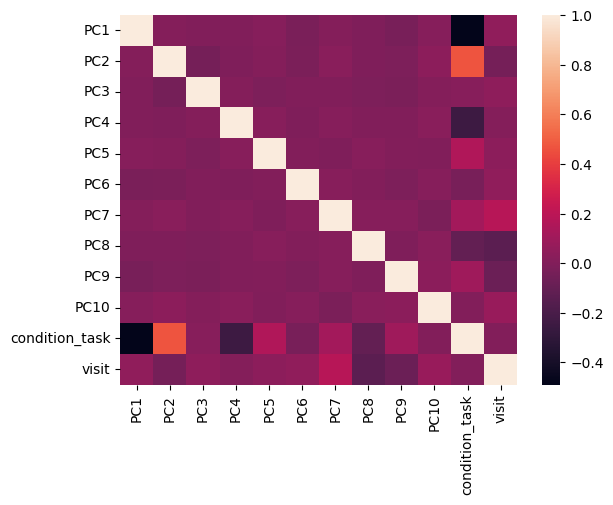

In [84]:
sns.heatmap(data.corr())

### Árboles de decisión (Grid Search)

In [85]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 30)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] # Mayor profundidad y menor cantidad de datos puede generar overfiting
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 4]
bootstrap = [True]
criterion = ['gini',  'entropy', 'log_loss']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion
               }

In [86]:
forestclf_grid = RandomForestClassifier()

rf_random = RandomizedSearchCV(
                              estimator=forestclf_grid,
                              param_distributions=random_grid,
                              n_iter=100,
                              cv=5,
                              verbose=2,
                              random_state=10,
                              n_jobs=-1 # todos los nucleos del computador 
                              )

rf_random.fit(X_train, y_train)

# 1. GridSearchCV -> hacer todas las combinaciones posibles 
# 2. Estandarizar o normalizar las métricas para tener rangos que permitan mejorar los resultados-> revisar 
# revisar el pca entrega los datos normalizados
# ISA: desiciontree ->XGBoosting funciones similares a randomforest que tiene métodos de optimización, con gradientes descendientes 
# LU: SMV   

#Modelos de Deep Learning -> construcción de redes neuronales  John -> red pequeña 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\Bioestadistica\dimentionReduction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Bioestadistica\dimentionReduction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Bioestadistica\dimentionReduction\.venv\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "d:\Bioestadistica\dimentionReduction\.venv\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 117, 184, 251, 318,
                                                         386, 453, 520, 587,
                                                         655, 722, 789, 856,
                                                         924, 991, 1058, 1125,
                                                         1193, 1260, 1327, 1394,
                                                         1462, 1529, 1596, 1663,
                                                         1731, 1798, 1865, 1932,
                                                         2000]},
                   random_state=10, verbose=2)

In [87]:
best_selected = rf_random.best_estimator_

In [88]:
best_selected.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=318)

In [89]:
predicted = best_selected.predict(X_test)

In [90]:
print(
    f"Classification report for classifier {best_selected}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )

Classification report for classifier RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=318):
              precision    recall  f1-score   support

         0.0       0.32      0.34      0.33        32
         1.0       0.10      0.07      0.08        30
         2.0       0.20      0.13      0.16        30
         3.0       0.17      0.28      0.21        29

    accuracy                           0.21       121
   macro avg       0.20      0.20      0.20       121
weighted avg       0.20      0.21      0.20       121




In [91]:
scores = cross_val_score(
                        estimator=best_selected,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )

In [92]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.3877551  0.375      0.29166667 0.22916667 0.35416667 0.33333333
 0.20833333 0.20833333 0.27083333 0.29166667]


In [93]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))


CV accuracy: 0.295 +/- 0.063


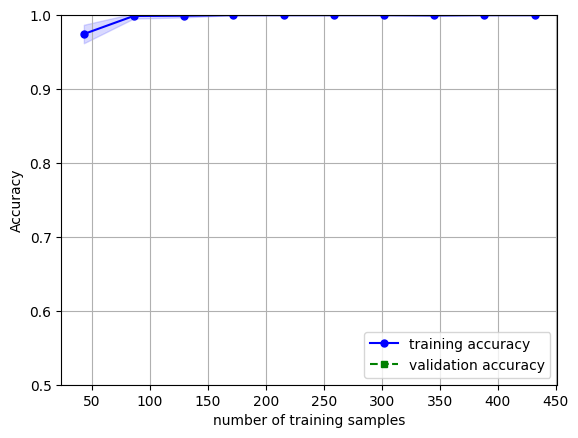

In [94]:
train_sizes, train_scores, test_scores = \
    learning_curve(
                  estimator=best_selected,
                  X=X_train,
                  y=y_train,
                  train_sizes=np.linspace(0.1, 1, 10),
                  cv=10,
                  n_jobs=-1
                  )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
        train_sizes,
        train_mean,
        color='blue',
        marker='o',
        markersize=5,
        label='training accuracy'
        )

plt.fill_between(
                train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue'
                )

plt.plot(
        train_sizes,
        test_mean,
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label='validation accuracy'
        )

plt.fill_between(
                train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15,
                color='green'
                )

plt.grid()
plt.xlabel('number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

In [95]:
!pip install --upgrade scikit-learn

[[11  8  4  9]
 [ 7  2  6 15]
 [ 5  7  4 14]
 [11  4  6  8]]


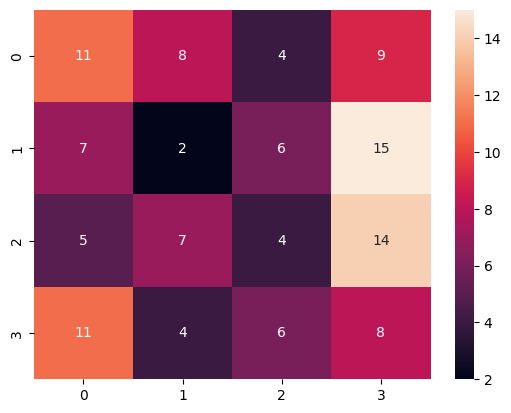

In [96]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predicted)
print(CM)
import seaborn
seaborn.heatmap(CM,annot=True)
plt.show()

### Árboles de decisión (Boruta)

In [97]:
feat_selector = BorutaPy(
                        verbose=2,
                        estimator=best_selected,
                        max_iter=100
                        )

In [98]:
feat_selector.fit(X_train, y_train)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
selected_features = []
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", data.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
        selected_features.append(data.columns[i])

In [ ]:
X_transform = feat_selector.transform(X_train)

In [ ]:
best_selected.fit(X_transform, y_train)

In [ ]:
selected_features = [data.columns.get_loc(c) for c in selected_features if c in data]
selected_features

In [ ]:
predicted = best_selected.predict(X_test[:,selected_features])

In [ ]:
print(
    f"Classification report for classifier {best_selected}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

In [ ]:
scores = cross_val_score(estimator=best_selected,
                        X=X_transform,
                        y=y_train,
                        cv=10,
                        n_jobs=-1)

In [ ]:
print('CV accuracy scores: %s' % scores)

In [ ]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))

In [ ]:
train_sizes, train_scores, test_scores = \
    learning_curve(
                  estimator=best_selected,
                  X=X_transform,
                  y=y_train,
                  train_sizes=np.linspace(0.1, 1, 10),
                  cv=10,
                  n_jobs=-1
                  )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
        train_sizes,
        train_mean,
        color='blue',
        marker='o',
        markersize=5,
        label='training accuracy'
        )

plt.fill_between(
                train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue'
                )

plt.plot(
        train_sizes,
        test_mean,
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label='validation accuracy'
        )

plt.fill_between(
                train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15,
                color='green'
                )

plt.grid()
plt.xlabel('number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

### Selección de caracteristicas con árboles de decisión

 1) PC7                            0.114725
 2) PC8                            0.110347
 3) PC10                           0.104282
 4) PC4                            0.097354
 5) PC5                            0.097239
 6) PC3                            0.097135
 7) PC9                            0.093525
 8) PC6                            0.090895
 9) PC2                            0.090656
10) PC1                            0.089852
11) condition_task                 0.013989


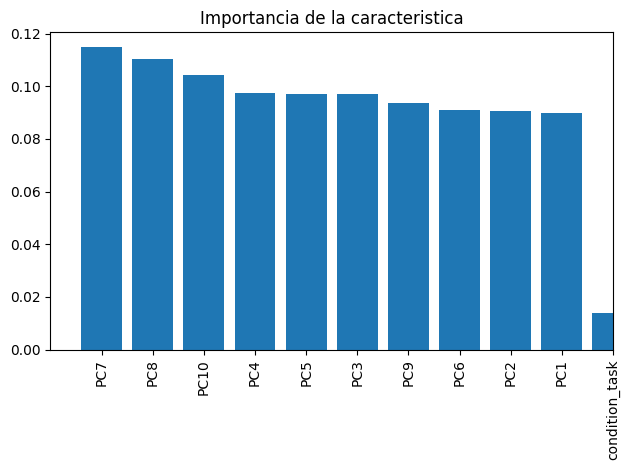

In [99]:
nombres_columnas = data.columns[:-1]
best_selected.fit(X_train, y_train)
features_scores = best_selected.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]
sorted_names = []

for f in range(X_train.shape[1]):

    sorted_names.append(nombres_columnas[index[f]])
    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))
    
plt.title('Importancia de la caracteristica')

plt.bar(range(X_train.shape[1]),
    features_scores[index],
    align='center')

plt.xticks(range(X_train.shape[1]),
    nombres_columnas[index],
    rotation=90)

plt.xlim([-1, 10])

plt.tight_layout()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

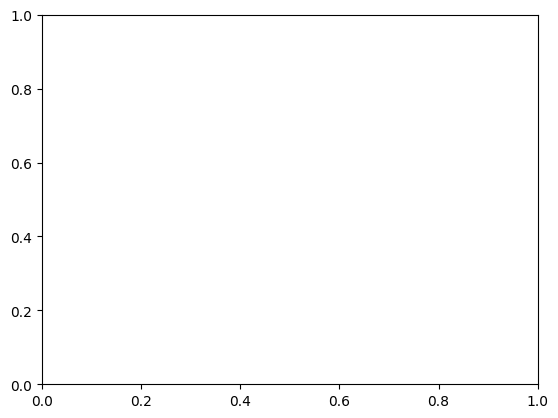

In [100]:
acc_per_feature = []
std_per_feature = []

for index, feature_name in enumerate(sorted_names,start=1):

    input_features_names = sorted_names[:index]
    input_features_index = [data.columns.get_loc(c) for c 
                      in input_features_names if c in data]
    best_selected.fit(X_train[:, input_features_index], y_train)
    scores = cross_val_score(
                        estimator=best_selected,
                        X=X_train[:, input_features_index],
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )
    acc_per_feature.append(np.mean(scores))
    std_per_feature.append(np.std(scores))

plt.plot(
        range(1, len(sorted_names)),
        acc_per_feature,
        color='red'
        ) 

plt.fill_between(
                range(1, len(sorted_names)),
                acc_per_feature + std_per_feature,
                acc_per_feature - std_per_feature,
                alpha=0.15,
                color='red'
                )

plt.grid()

### SVM (Grid Search)

In [ ]:
svm_param_grid = {'C': list(np.logspace(-1, 4, 6)), 
                 'gamma': list(np.logspace(-3, 2, 6)) + ['Auto'] + ['scale'],
                 'kernel': ['rbf', 'poly']} 

svc = SVC()
svc_clf = GridSearchCV(
    
                      svc,
                      svm_param_grid,
                      n_jobs=-1,
                      cv=10
                      )

svm_best_clf = svc_clf.fit(X_train, y_train)
best_model = svm_best_clf.best_estimator_

d:\Bioestadistica\dimentionReduction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
98 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Bioestadistica\dimentionReduction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Bioestadistica\dimentionReduction\.venv\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "d:\Bioestadistica\dimentionReduction\.venv\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_

In [ ]:
best_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1.0, kernel='poly')

In [ ]:
predicted = best_model.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {best_model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )

Classification report for classifier SVC(C=0.1, gamma=1.0, kernel='poly'):
              precision    recall  f1-score   support

         0.0       0.26      0.28      0.27        32
         1.0       0.41      0.37      0.39        30
         2.0       0.25      0.30      0.27        30
         3.0       0.46      0.38      0.42        29

    accuracy                           0.33       121
   macro avg       0.35      0.33      0.34       121
weighted avg       0.34      0.33      0.33       121




### SVM (Permutation importance)

In [ ]:
results = permutation_importance(
                                best_model,
                                X_train,
                                y_train,
                                scoring='accuracy'
                                )

nombres_columnas = data.columns[:-1]
importance = results.importances_mean
index = np.argsort(importance)

for v, idx in zip(importance, index):
    
    print(f'Feature: {nombres_columnas[idx]} | Score: {v}')


Feature: condition_task | Score: 0.47650727650727653
Feature: PC10 | Score: 0.5130977130977131
Feature: PC6 | Score: 0.45862785862785865
Feature: PC7 | Score: 0.4486486486486486
Feature: PC9 | Score: 0.44698544698544695
Feature: PC8 | Score: 0.41746361746361743
Feature: PC5 | Score: 0.42037422037422034
Feature: PC4 | Score: 0.44407484407484404
Feature: PC3 | Score: 0.4241164241164241
Feature: PC1 | Score: 0.39002079002079004
Feature: PC2 | Score: 0.19126819126819122


### SVM con caracteristicas seleccionadas del árbol de decisión

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

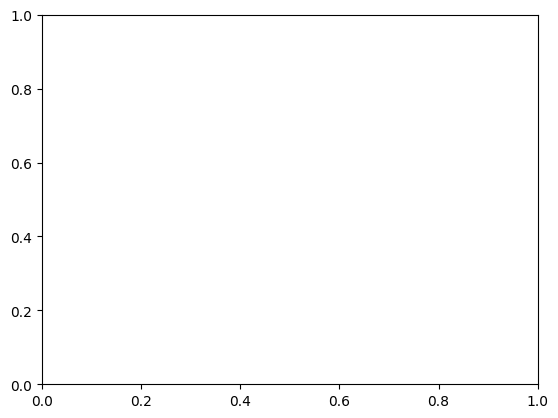

In [ ]:
acc_per_feature = []
std_per_feature = []

for index, feature_name in enumerate(sorted_names,start=1):

    input_features_names = sorted_names[:index]
    input_features_index = [data.columns.get_loc(c) for c 
                      in input_features_names if c in data]
    best_model.fit(X_train[:, input_features_index], y_train)
    scores = cross_val_score(
                        estimator=best_model,
                        X=X_train[:, input_features_index],
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )
    acc_per_feature.append(np.mean(scores))
    std_per_feature.append(np.std(scores))

plt.plot(
        range(1, len(sorted_names)),
        acc_per_feature,
        color='red'
        ) 

plt.fill_between(
                range(1, len(sorted_names)),
                acc_per_feature + std_per_feature,
                acc_per_feature - std_per_feature,
                alpha=0.15,
                color='red'
                )

plt.grid()

### XGBoosting

### TPOT

In [104]:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier()

d:\Bioestadistica\dimentionReduction\.venv\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [106]:
pipeline_optimizer = TPOTClassifier(
                                    generations=5,
                                    population_size=int(X.shape[0]*0.4),
                                    cv=10,
                                    random_state=10,
                                    verbosity=3,
                                    n_jobs=-1
                                    )

In [107]:
pipeline_optimizer.fit(X_train, y_train)

32 operators have been imported by TPOT.
_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as metric. Ward can only work with euclidean distances..
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 86.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X

TPOTClassifier(cv=10, generations=5, n_jobs=-1, population_size=240,
               random_state=10, verbosity=3)

In [109]:
pipeline_optimizer

TPOTClassifier(cv=10, generations=5, n_jobs=-1, population_size=240,
               random_state=10, verbosity=3)

In [108]:
print(pipeline_optimizer.score(X_test, y_test))

0.17355371900826447


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(X_test, DecisionTreeClassifier__criterion='gini', DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=10, DecisionTreeClassifier__min_samples_split=14)